In [1]:
import pandas as pd
import pyfolio as pf
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Belo\Anaconda3\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
retcsv = pd.read_csv('test.csv', parse_dates=True)
retcsv['Time'] = retcsv['Time'].astype(str)
retcsv.head()
#print(retcsv.columns.values)

,Time,Trade_Profit,Cost,N_Trade,PnL
0,2020-01-17 10:45:00,0.0,0.0,0,0.0
1,2020-01-17 11:00:00,0.0,0.0,0,0.0
2,2020-01-17 11:15:00,0.0,0.0,0,0.0
3,2020-01-17 11:30:00,0.0,0.0,0,0.0
4,2020-01-17 13:15:00,0.0,0.0,0,0.0


In [3]:
retcsv['Time'] = retcsv['Time'].str.slice(0,10)
retcsv['Time'] = pd.to_datetime(retcsv['Time'], format='%Y-%m-%d')
#convert 15-minute level date to daily level data
retcsv= retcsv.drop_duplicates(subset =['Time'],keep ='last')
retcsv['return'] =  np.log(retcsv.loc[:,'PnL']) -np.log(retcsv.loc[:,'PnL'].shift(1))
#retcsv['i_ret'] =  np.log(retcsv.loc[:,'i']) -np.log(retcsv.loc[:,'i'].shift(1))
retcsv.head()


C:\Users\Belo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Belo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


,Time,Trade_Profit,Cost,N_Trade,PnL,return
11,2020-01-17,0.0,0.0,0,0.0,NaN
27,2020-01-20,0.0,0.0,0,0.0,NaN
43,2020-01-21,0.0,0.0,0,0.0,NaN
59,2020-01-22,0.0,0.0,0,0.0,NaN
75,2020-01-23,0.0,0.0,0,0.0,NaN


In [4]:
retcsv = retcsv.set_index('Time')
ret = retcsv['return'].tz_localize('UTC')
start = '2020-01-17'


Start date,2020-01-17
End date,2020-12-07
Total months,10
,Backtest
Annual return,262.7%
Cumulative returns,198.6%
Annual volatility,124.1%
Sharpe ratio,1.83
Calmar ratio,12.96
Stability,0.20
Max drawdown,-20.3%


C:\Users\Belo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,20.27,2020-04-24,2020-05-22,2020-06-29,47
1,15.15,2020-06-29,2020-07-06,NaT,NaN
2,2.01,2020-04-13,2020-04-16,2020-04-17,5
3,1.74,2020-04-21,2020-04-23,2020-04-24,4
4,0.59,2020-04-17,2020-04-20,2020-04-21,3


C:\Users\Belo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


Stress Events,mean,min,max
New Normal,0.90%,-9.79%,80.29%


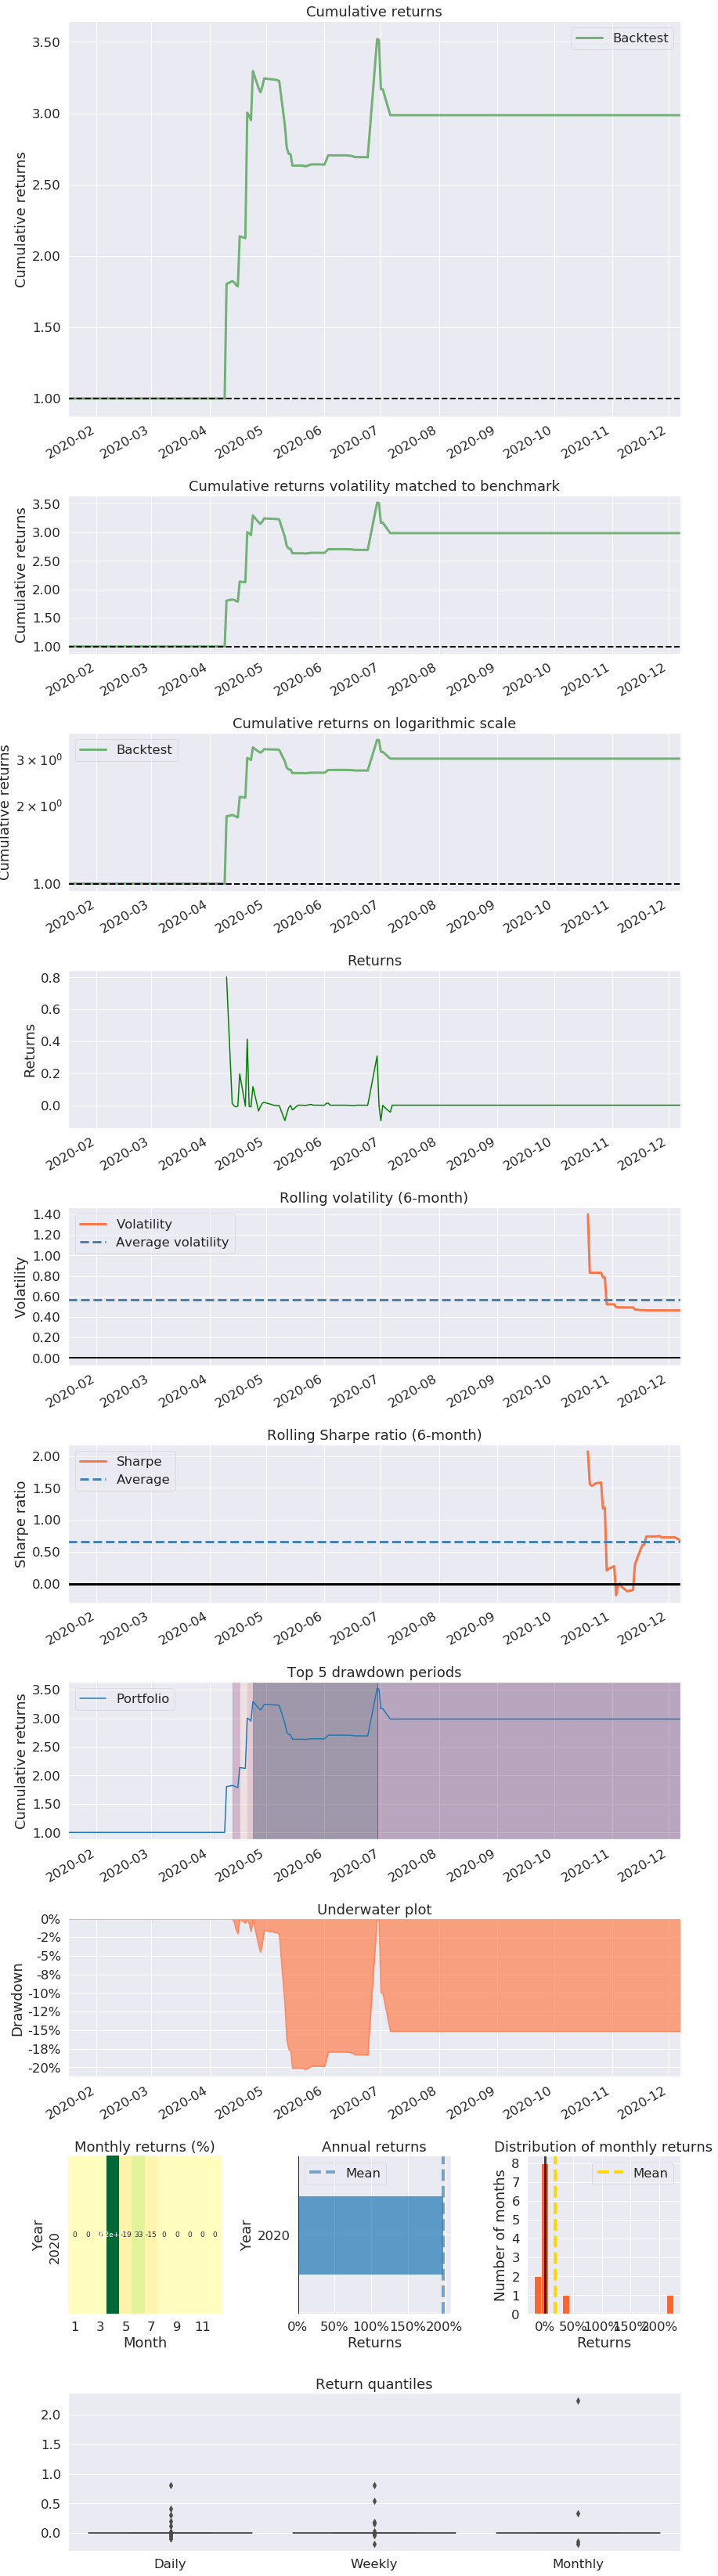

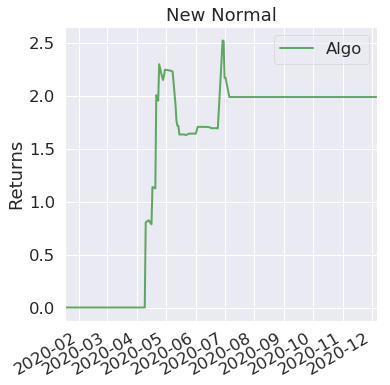

In [5]:
pf.create_full_tear_sheet(ret)